In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [7]:
df = pd.read_excel("/content/drive/MyDrive/Healthcare_premium_pred/datasets/premiums_young_with_gr.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [8]:
df.shape

(20096, 14)

In [9]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4


### Handle NA values

In [11]:
df.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,2
employment_status,1
income_level,4
income_lakhs,0


In [12]:
df.dropna(inplace=True)
df.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,0
employment_status,0
income_level,0
income_lakhs,0


### Handle Duplicate Values

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [15]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [16]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

,number_of_dependants
count,20090.000000
mean,0.722598
std,0.937200
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


### Outlier Detection

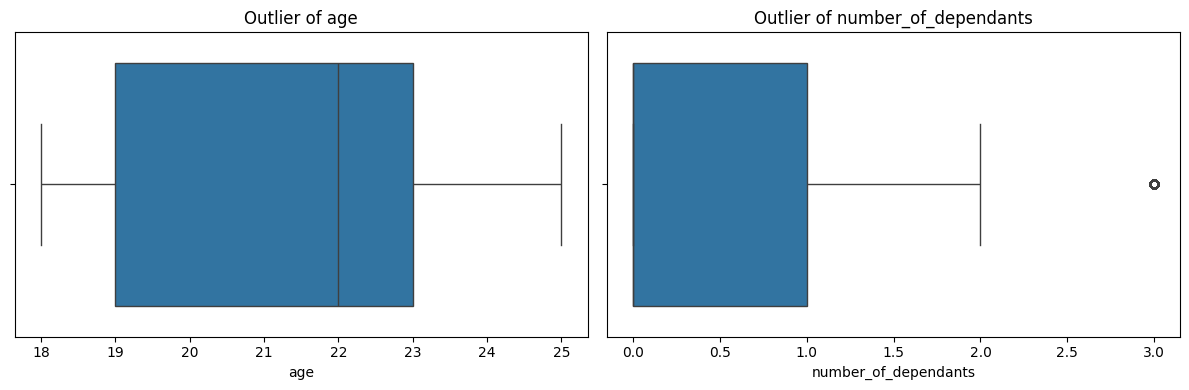

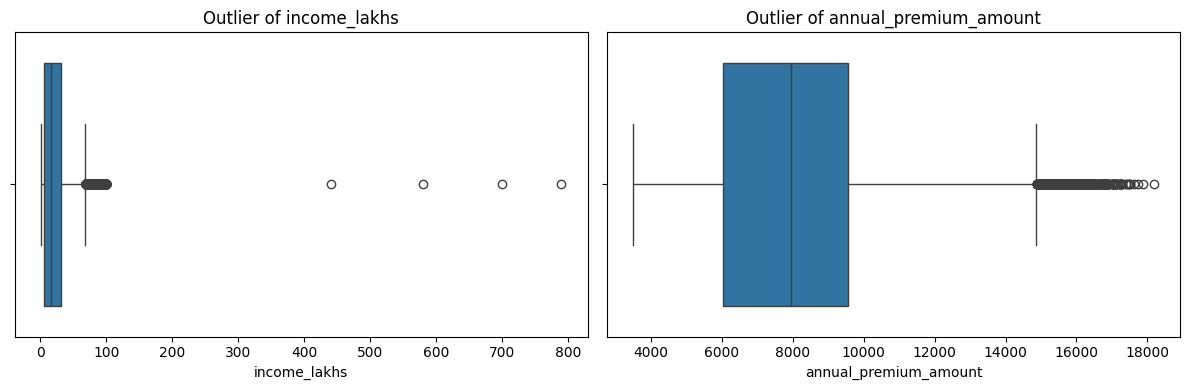

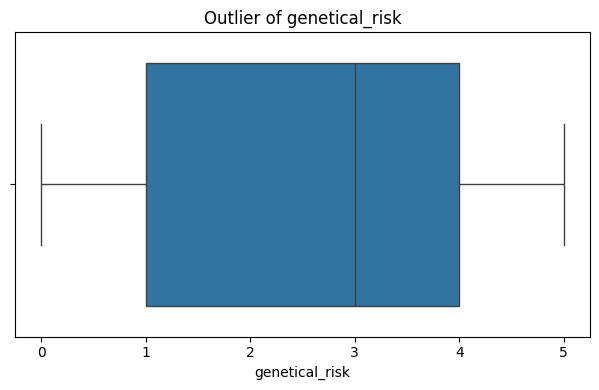

In [17]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

for i in range(0, len(numeric_cols), 2):
    plt.figure(figsize=(12, 4))

    # First plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[numeric_cols[i]])
    plt.title(f"Outlier of {numeric_cols[i]}")

    # Second plot (if exists)
    if i + 1 < len(numeric_cols):
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[numeric_cols[i + 1]])
        plt.title(f"Outlier of {numeric_cols[i + 1]}")

    plt.tight_layout()
    plt.show()


In [18]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [19]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


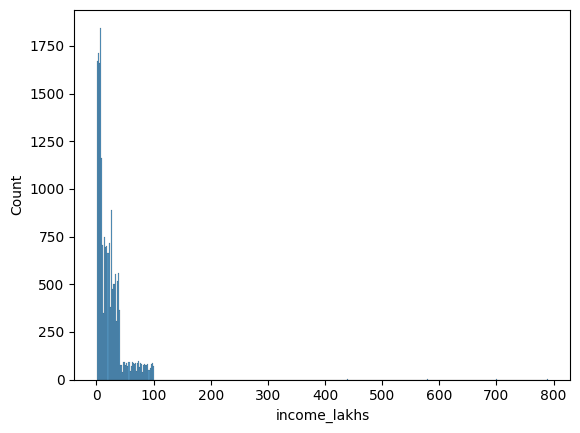

In [20]:
sns.histplot(df1['income_lakhs'])
plt.show()

In [21]:
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return lower_bound, upper_bound

In [22]:
get_iqr_bounds(df1['income_lakhs'])

(-31.5, 68.5)

In [23]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [24]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


### Dataset skeww check

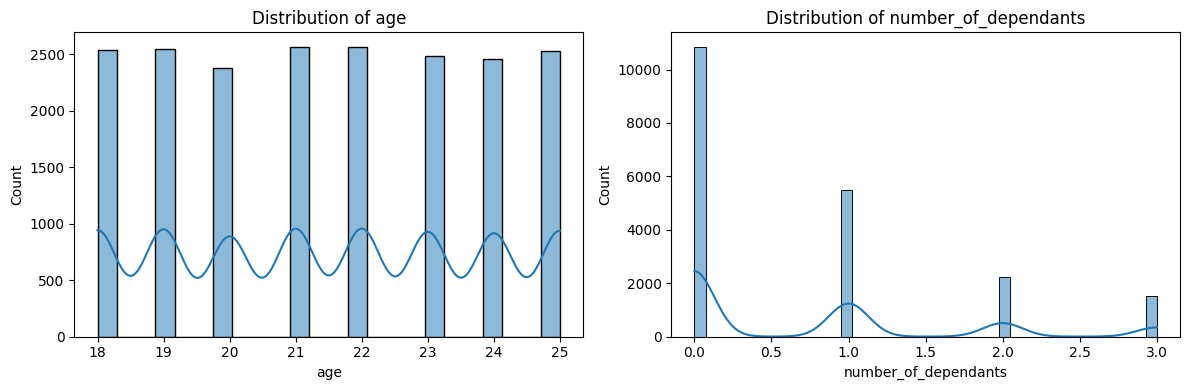

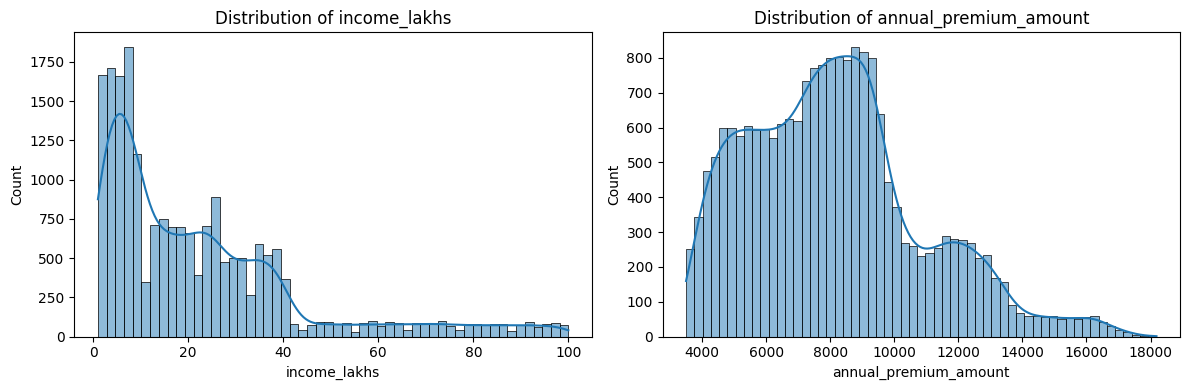

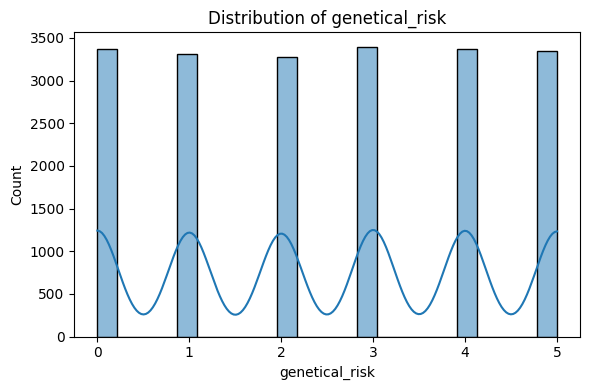

In [25]:
numeric_cols = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64']]

# Loop through in steps of 2
for i in range(0, len(numeric_cols), 2):
    # If it's the last column and no pair available
    if i + 1 >= len(numeric_cols):
        plt.figure(figsize=(6, 4))
        sns.histplot(df2[numeric_cols[i]], kde=True)
        plt.title(f"Distribution of {numeric_cols[i]}")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(12, 4))

        # First histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df2[numeric_cols[i]], kde=True)
        plt.title(f"Distribution of {numeric_cols[i]}")

        # Second histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df2[numeric_cols[i + 1]], kde=True)
        plt.title(f"Distribution of {numeric_cols[i + 1]}")

        plt.tight_layout()
        plt.show()

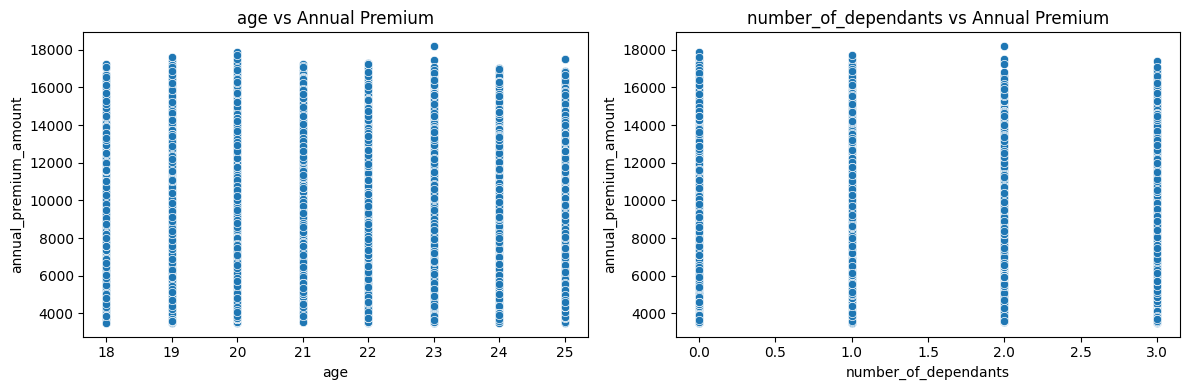

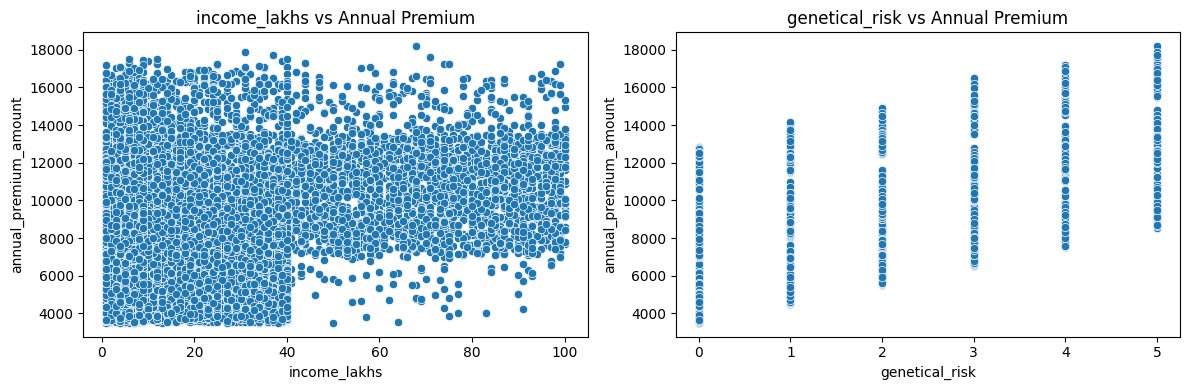

In [26]:
# Get all numeric columns except 'annual_premium_amount'
numeric_cols = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64'] and col != 'annual_premium_amount']

# Loop and plot
for i in range(0, len(numeric_cols), 2):
    plt.figure(figsize=(12, 4))

    # First plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df2, x=numeric_cols[i], y='annual_premium_amount')
    plt.title(f"{numeric_cols[i]} vs Annual Premium")

    # Second plot (if exists)
    if i + 1 < len(numeric_cols):
        plt.subplot(1, 2, 2)
        sns.scatterplot(data=df2, x=numeric_cols[i + 1], y='annual_premium_amount')
        plt.title(f"{numeric_cols[i + 1]} vs Annual Premium")

    plt.tight_layout()
    plt.show()


In [27]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4


In [28]:
cat_col = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in cat_col:
  print(col,":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


### Dirty Read values in smoking_status...

In [29]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
})
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [30]:
pct_count = df2['gender'].value_counts(normalize=True)
pct_count

,proportion
gender,
Male,0.550383
Female,0.449617


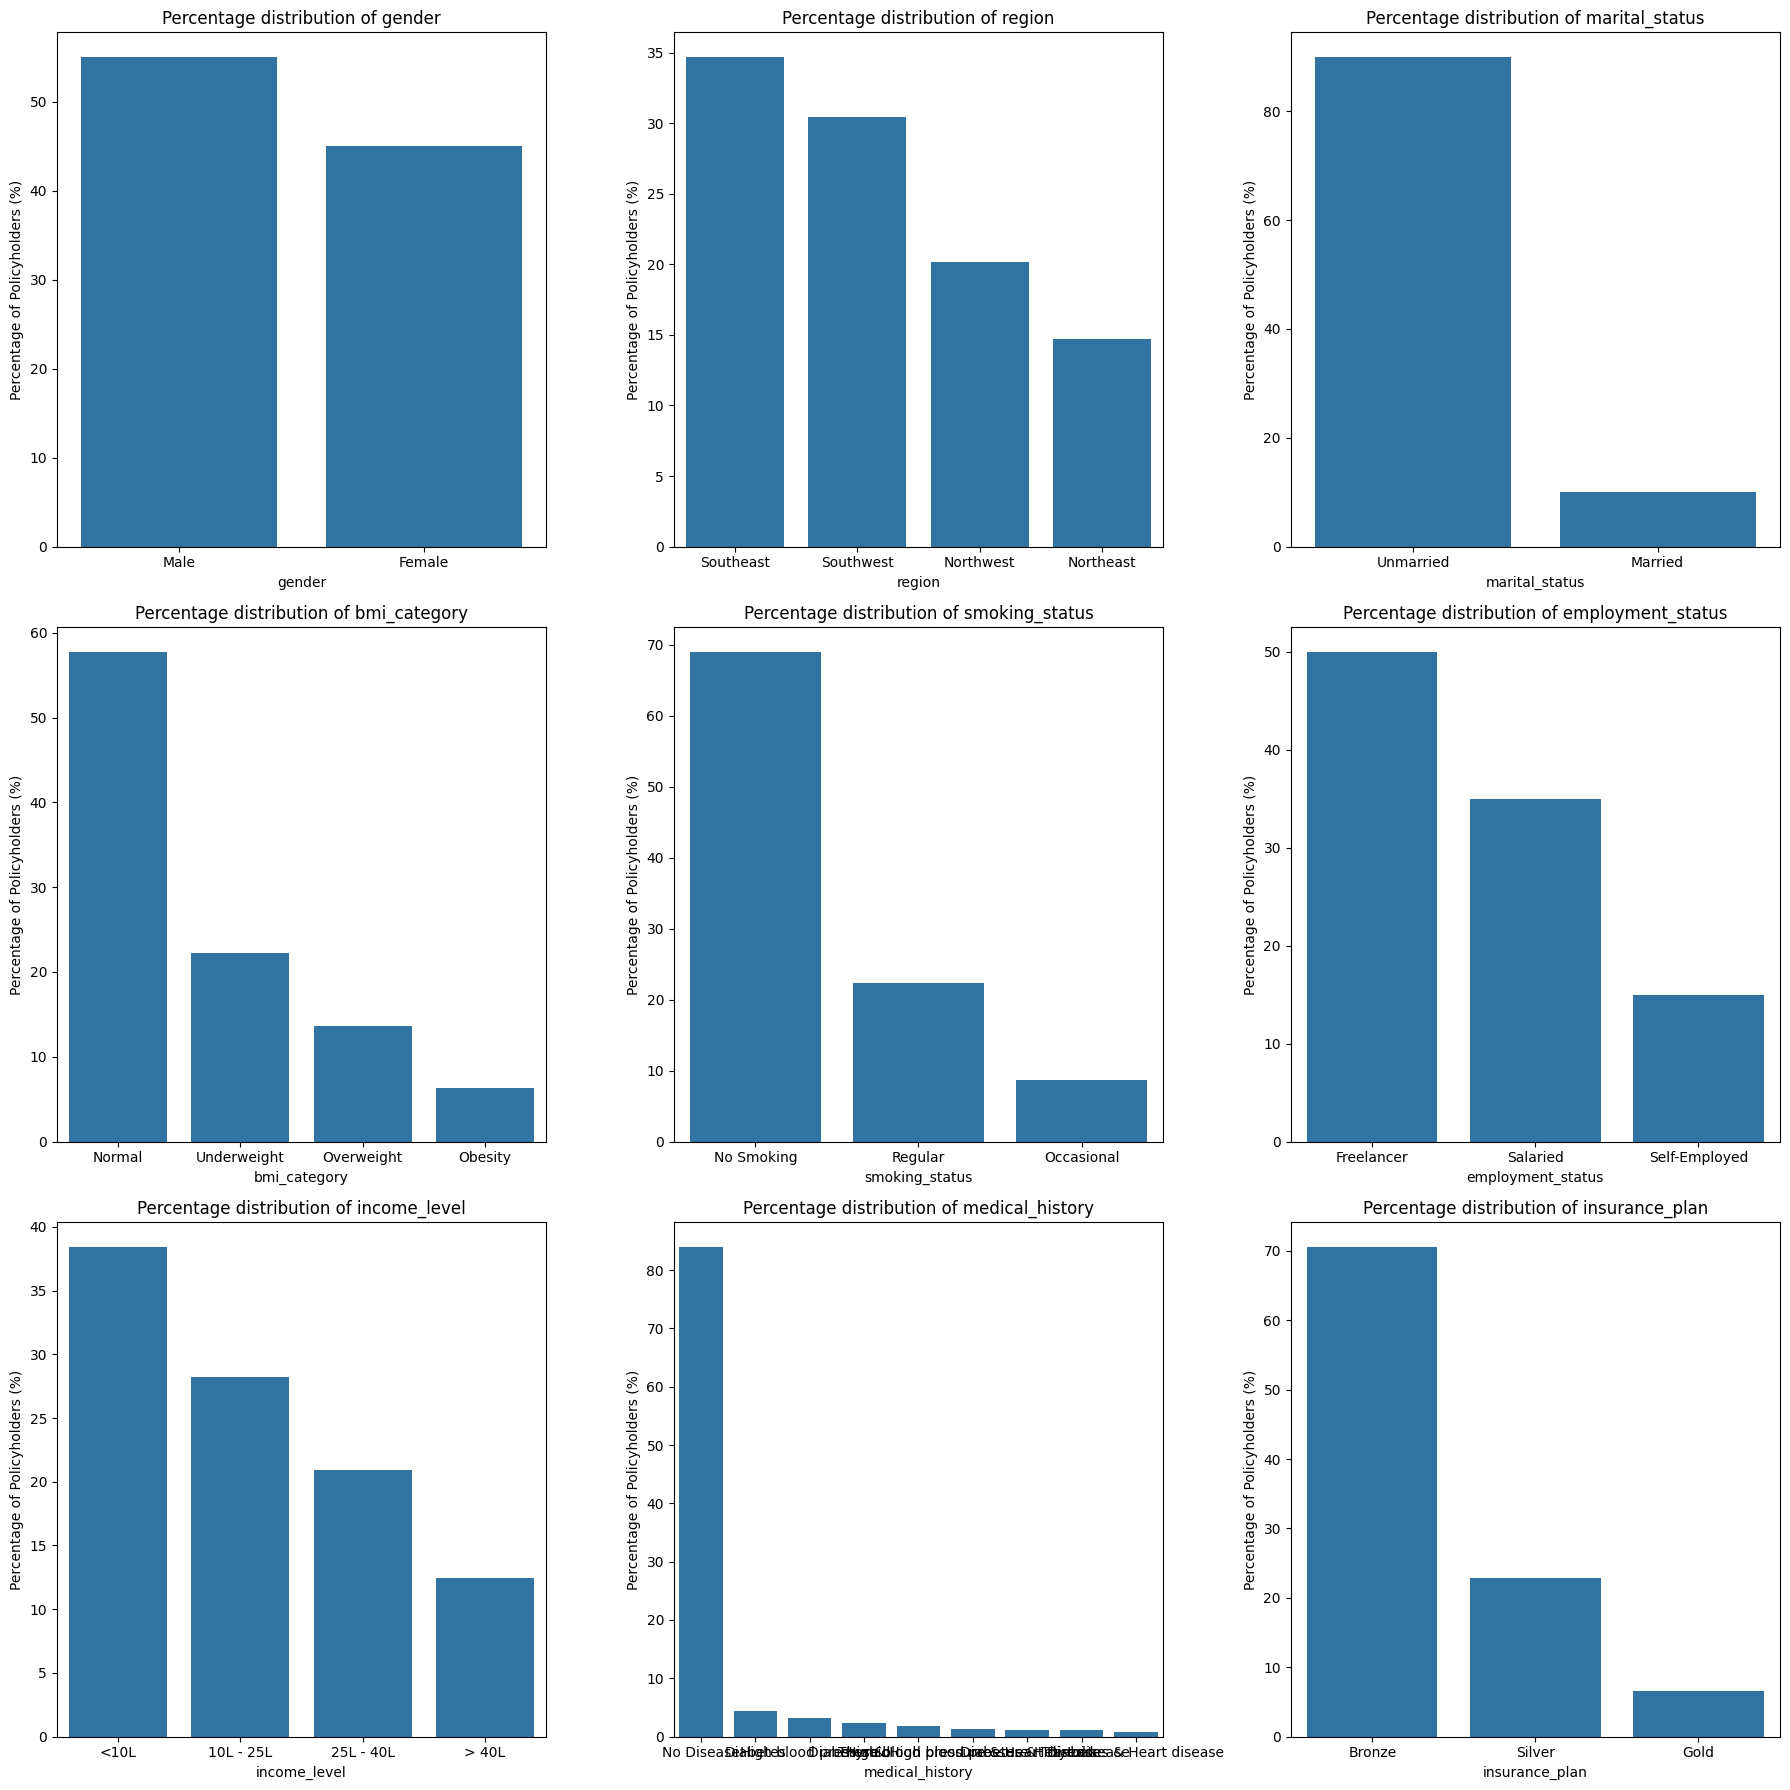

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for ax, column in zip(axes, cat_col):
  # Calculate the percentage distribution of each category.
  category_counts = df2[column].value_counts(normalize=True) * 100
  sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
  ax.set_title(f'Percentage distribution of {column}')
  ax.set_ylabel('Percentage of Policyholders (%)')
  ax.set_xlabel(column)

plt.tight_layout()
plt.show()


## Income vs Plan. --> Bivariate analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


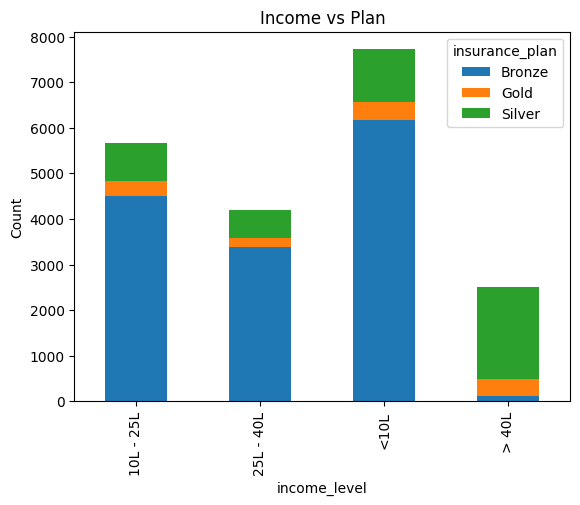

In [32]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True)
plt.title("Income vs Plan")
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

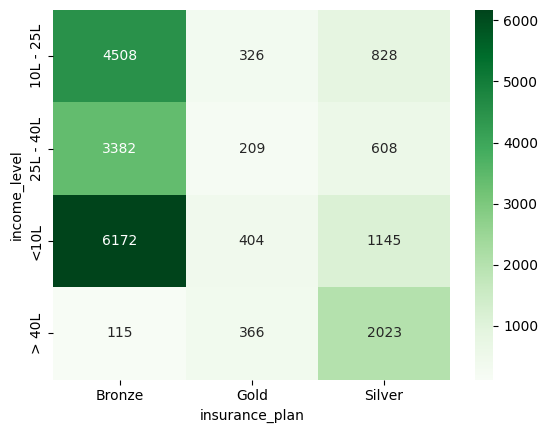

In [33]:
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Greens')

# <h1 style="color:blue;">Feature Engineering</h1>

In [34]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [35]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [36]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None


In [37]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
10690,20,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,74,No Disease,Silver,9071,2,no disease,None
7577,24,Male,Southwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,4,No Disease,Bronze,8079,4,no disease,None
17637,24,Male,Southeast,Married,3,Underweight,No Smoking,Freelancer,> 40L,100,No Disease,Silver,7787,0,no disease,None
2028,22,Male,Southwest,Unmarried,0,Underweight,Regular,Self-Employed,25L - 40L,29,High blood pressure,Bronze,8251,3,high blood pressure,None
6114,21,Male,Southeast,Unmarried,0,Obesity,No Smoking,Freelancer,25L - 40L,35,No Disease,Bronze,9957,5,no disease,None


# Working on risk factor according to the disease

In [38]:
risk_score = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}


In [39]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0


for disease in ['disease1', 'disease2']:
  df2['total_risk_score'] += df2[disease].map(risk_score)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(3)

/tmp/ipython-input-2959938099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/tmp/ipython-input-2959938099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000


In [40]:
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
10499,23,Male,Southeast,Unmarried,0,Overweight,Regular,Salaried,25L - 40L,27,No Disease,Bronze,6041,1,no disease,none,0,0.0
20006,23,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,5,No Disease,Bronze,6221,2,no disease,none,0,0.0
17998,22,Female,Northwest,Unmarried,1,Normal,No Smoking,Freelancer,<10L,4,No Disease,Bronze,8979,5,no disease,none,0,0.0


### Encoding Technique

In [41]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [42]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2.insurance_plan.unique()

array([2, 1, 3])

In [43]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [44]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '> 40L': 4, '25L - 40L': 3})

In [45]:
df2['income_level'].unique()

array([4, 1, 2, 3])

In [46]:
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
3319,22,Male,Southwest,Unmarried,1,Normal,No Smoking,Freelancer,2,17,No Disease,1,9077,5,no disease,none,0,0.000000
8902,18,Female,Southeast,Unmarried,1,Normal,Occasional,Freelancer,3,32,No Disease,1,5629,1,no disease,none,0,0.000000
13007,23,Male,Northeast,Unmarried,0,Normal,Regular,Freelancer,2,11,Diabetes,1,7344,2,diabetes,none,6,0.428571


In [47]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [48]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0


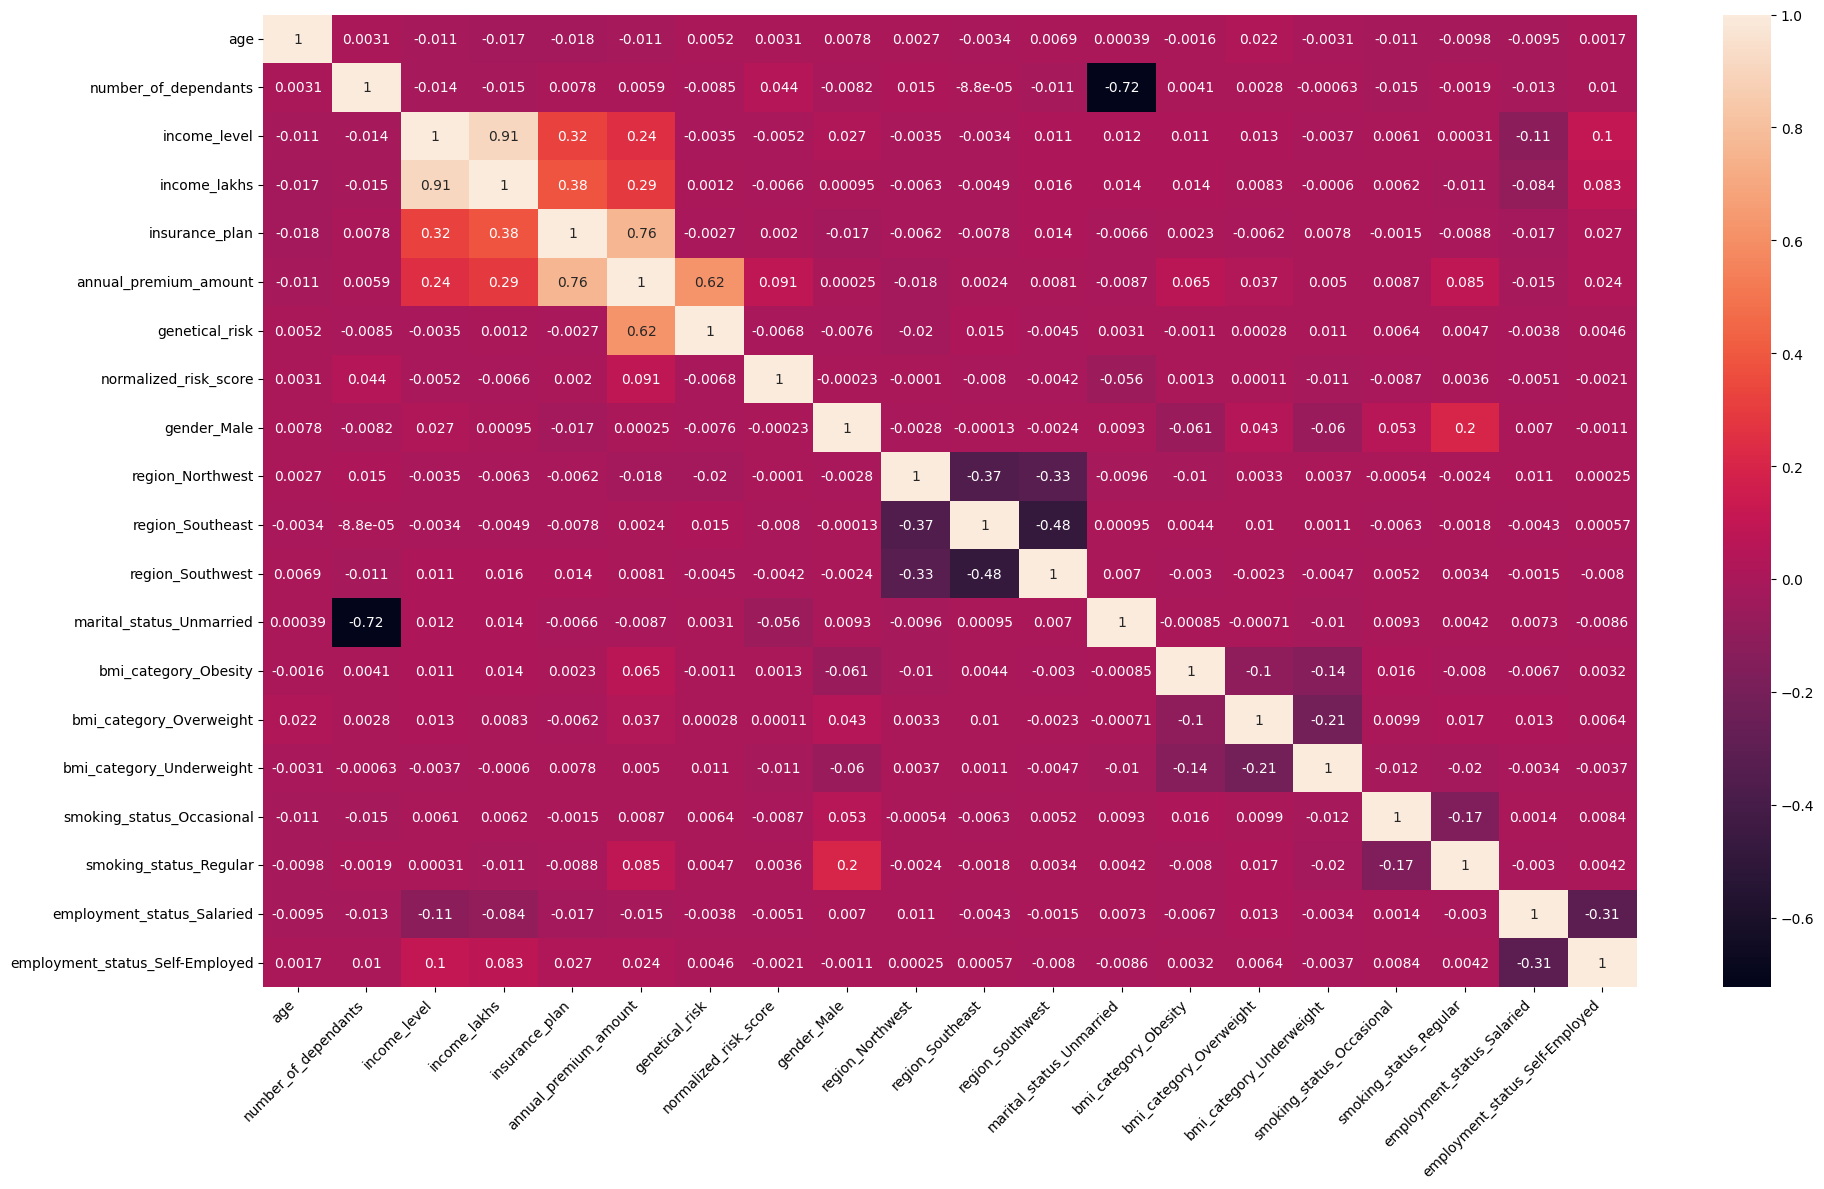

In [49]:
cm = df4.corr() # Call the corr() method to get the correlation matrix

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Scaling ->

In [50]:
df4.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [51]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,2.503883,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,1.710184,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df = pd.DataFrame()
  vif_df['Column'] = data.columns
  vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  return vif_df

In [53]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [54]:
calculate_vif(X.drop('income_level', axis='columns'))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [55]:
X_reduced = X.drop('income_level', axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


# **Model Training ->**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

print("X train:", X_train.shape)
print("X test:", X_test.shape)
print("y train:", y_train.shape)
print("y test:", y_test.shape)

X train: (14060, 18)
X test: (6026, 18)
y train: (14060,)
y test: (6026,)




> train_score and test_score both are same, So there is not any case of Model overfitting.



In [57]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score, test_score

(0.988297900194864, 0.9887263253056615)

In [58]:
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        9.99397746e+02,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [59]:
model_lr.intercept_

np.float64(3978.823528438261)

### Finding the Feature Participation among the training

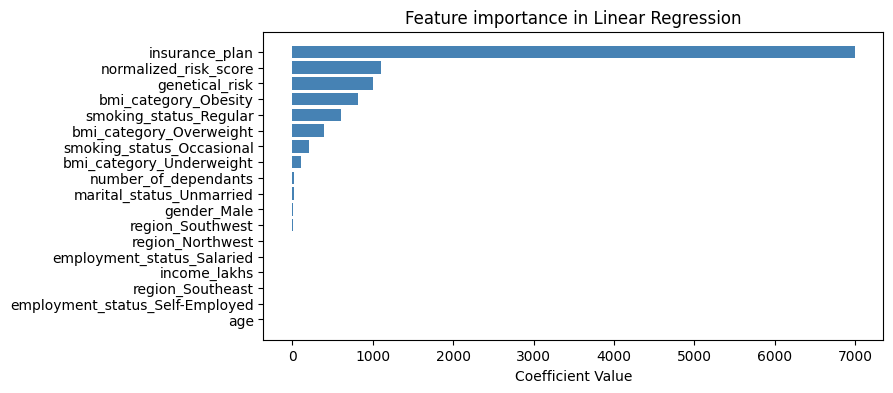

In [60]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [61]:
alpha_rng = [1, 0.1, 10.0, 5, 0.01]

for alpha in alpha_rng:
    model_rg = Ridge(alpha=alpha)
    model_rg.fit(X_train, y_train)
    train_score = model_rg.score(X_train, y_train)
    test_score = model_rg.score(X_test, y_test)
    print(f'Training score for alpha {alpha}: {train_score:.2f} | Testing score: {test_score:.2f}')

Training score for alpha 1: 0.99 | Testing score: 0.99
Training score for alpha 0.1: 0.99 | Testing score: 0.99
Training score for alpha 10.0: 0.99 | Testing score: 0.99
Training score for alpha 5: 0.99 | Testing score: 0.99
Training score for alpha 0.01: 0.99 | Testing score: 0.99


In [62]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.9925054907798767, 0.987729549407959)

In [63]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_pred, y_test)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  93312.703125 RMSE:  305.47128036036383


In [64]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=4)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9884945352872213)

In [65]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 4, 'learning_rate': 0.2}

In [66]:
best_model = random_search.best_estimator_

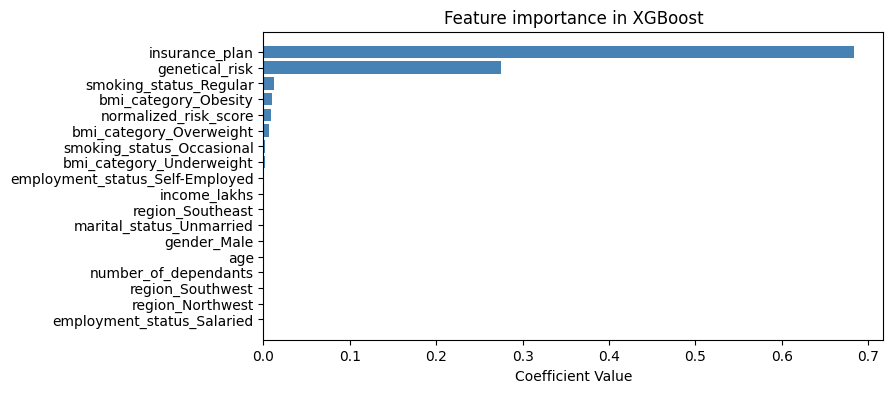

In [67]:
feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in XGBoost')
plt.show()



> XGBoost has given a good accuracy comparison to Linear Regression, but this feature importance is not good as compared to Linear_reg model.



## Error Analysis..

In [68]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

result_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6104.094727,-133.905273,-2.146606
14758,9462,9616.156250,154.156250,1.629214
13205,5152,5585.136719,433.136719,8.407157
14278,6988,7419.788086,431.788086,6.178994
19351,4917,5107.060059,190.060059,3.865366




> We can see here diff_pct for some values is too high, which is a big error.



<Axes: xlabel='diff_pct', ylabel='Count'>

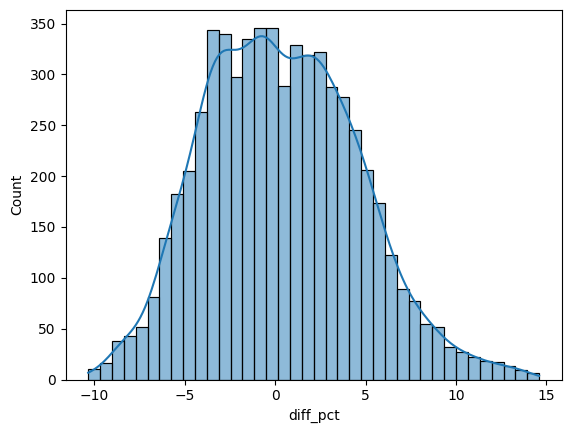

In [69]:
sns.histplot(result_df['diff_pct'], kde=True)

In [70]:
extreme_error_threshold = 10

extreme_result_df = result_df[np.abs(result_df.diff_pct)>extreme_error_threshold]
extreme_result_df.shape

(119, 4)

In [71]:
extreme_result_pct = extreme_result_df.shape[0]*100/result_df.shape[0]
extreme_result_pct

1.9747759707932293

In [72]:
result_df[np.abs(result_df['diff_pct']>50)].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct


In [73]:
extreme_result_df.index

Index([12669,  2918, 17084, 13565,  7181, 12285, 13476, 15481,  2948,  4919,
       ...
         355, 13574, 15166,  4204,  8692,  1986, 16062,  8008,  9714,  1534],
      dtype='int64', length=119)

In [74]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df.shape

(119, 18)

In [75]:
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.0,0.000000,0.0,0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.0,0.151515,0.0,1,0.0,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.0,0.353535,0.0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0
13565,0.428571,0.0,0.242424,0.0,0,0.0,1,0,0,0,1,0,0,0,1,0,1,0
7181,0.571429,0.0,0.161616,0.0,0,0.0,1,0,0,1,1,0,0,0,0,0,0,0


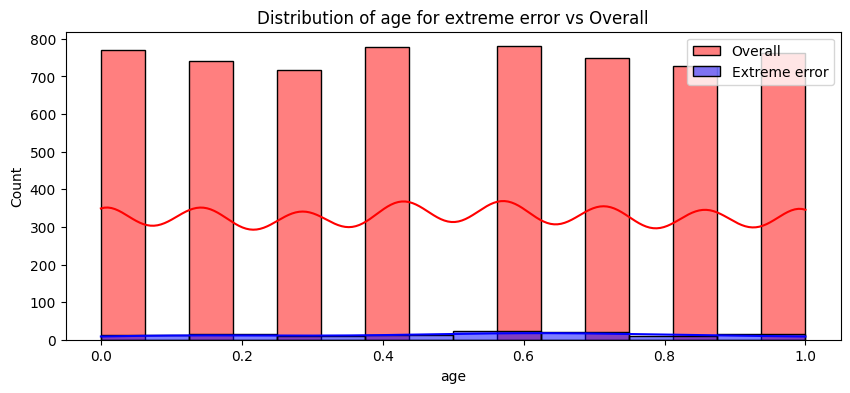

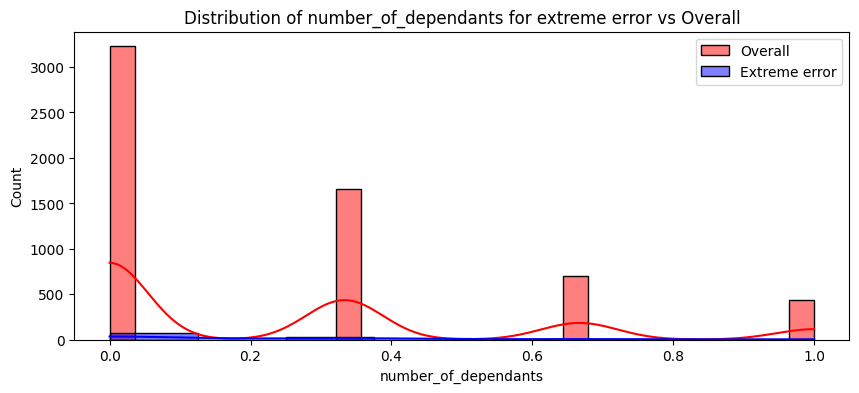

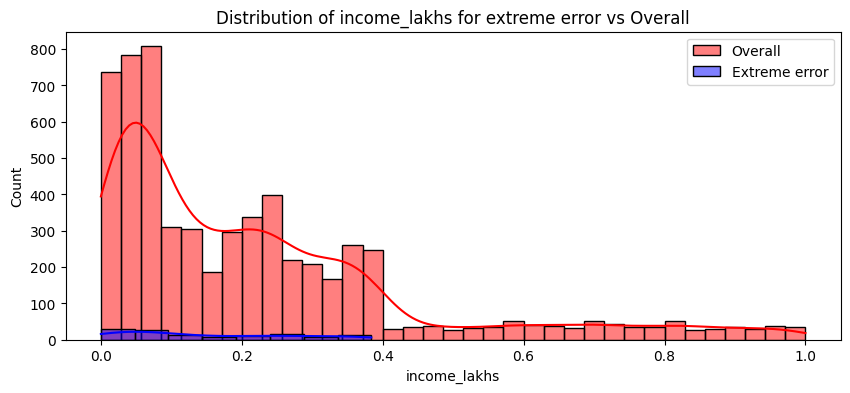

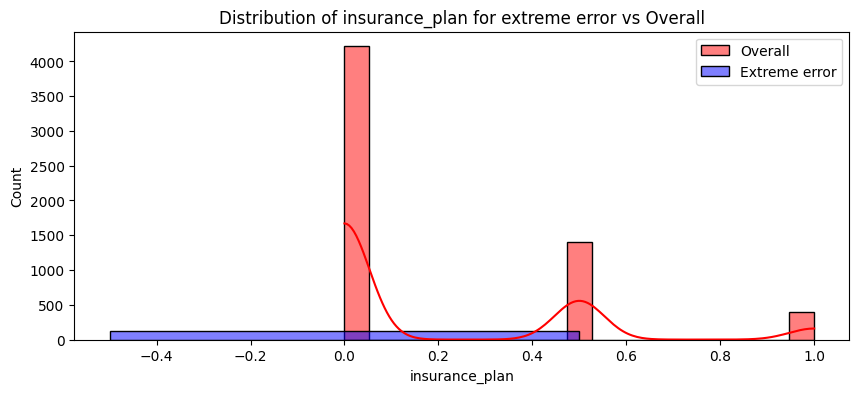

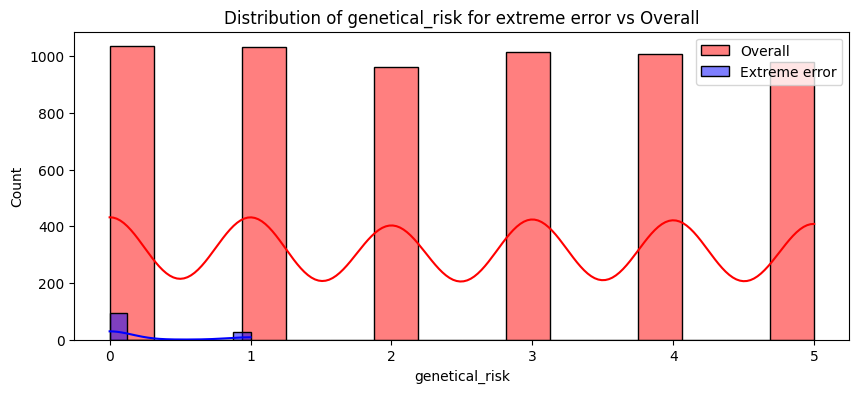

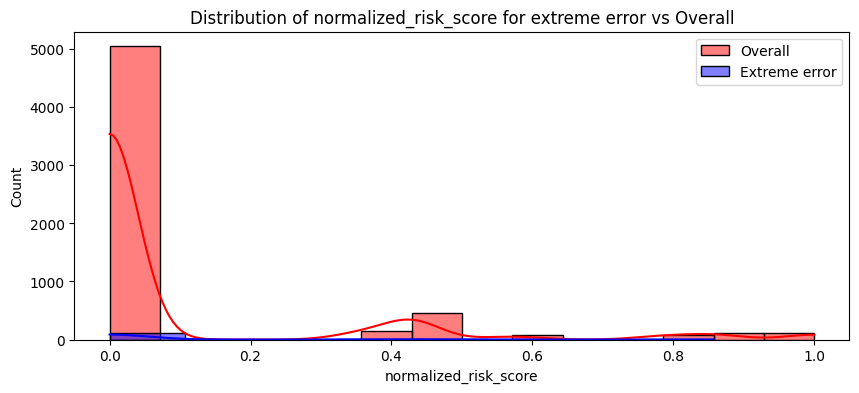

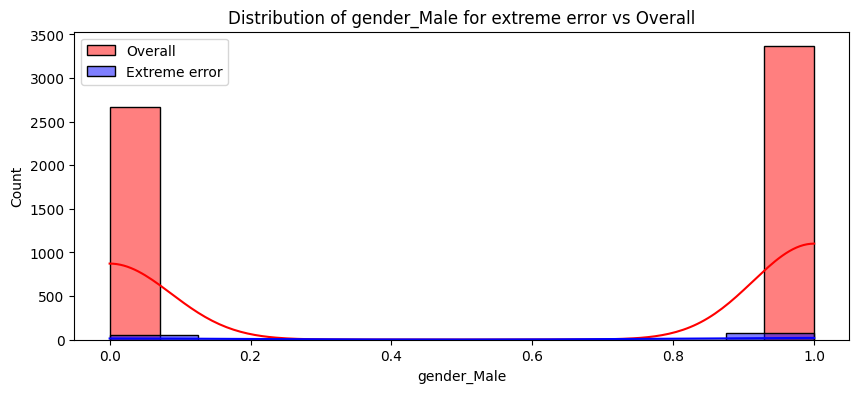

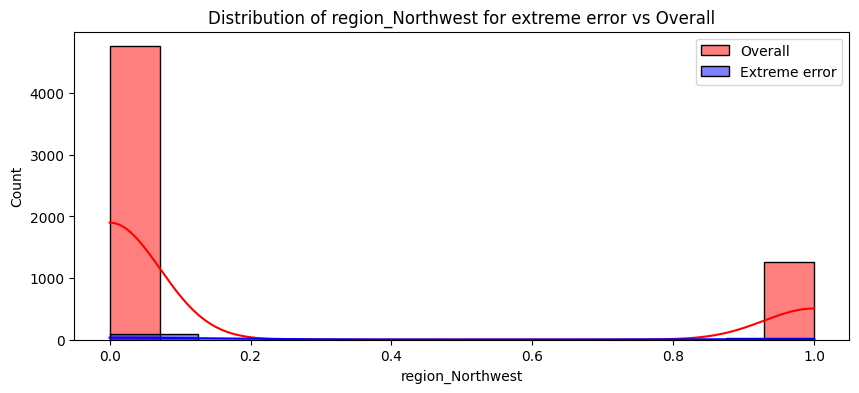

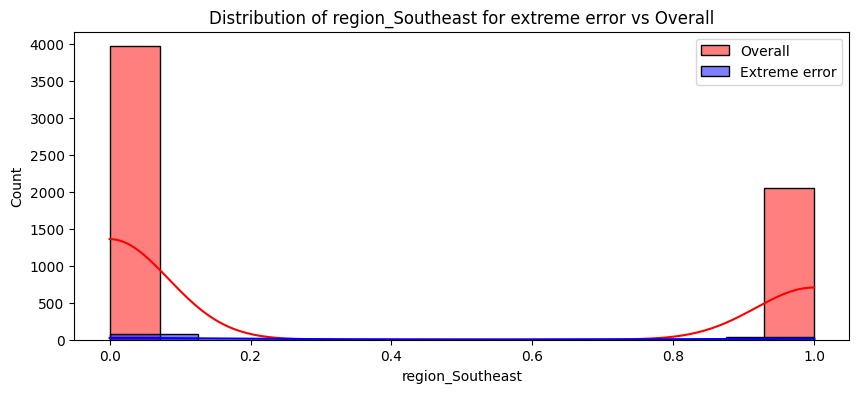

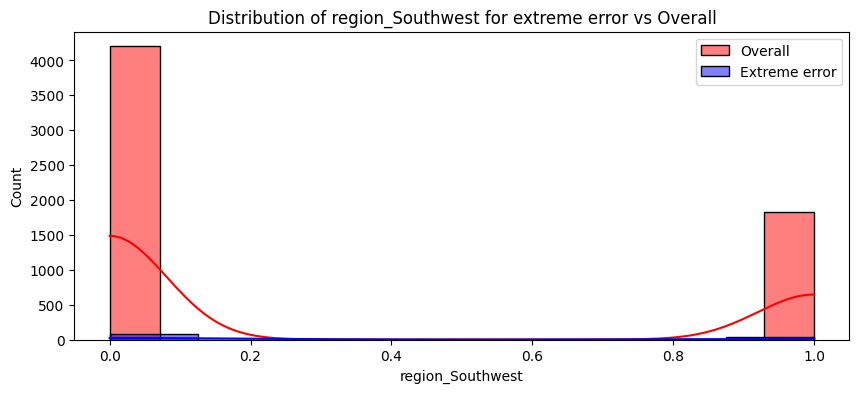

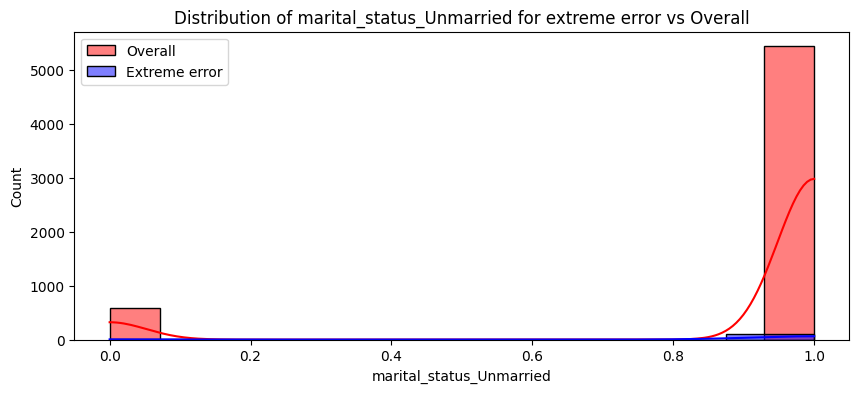

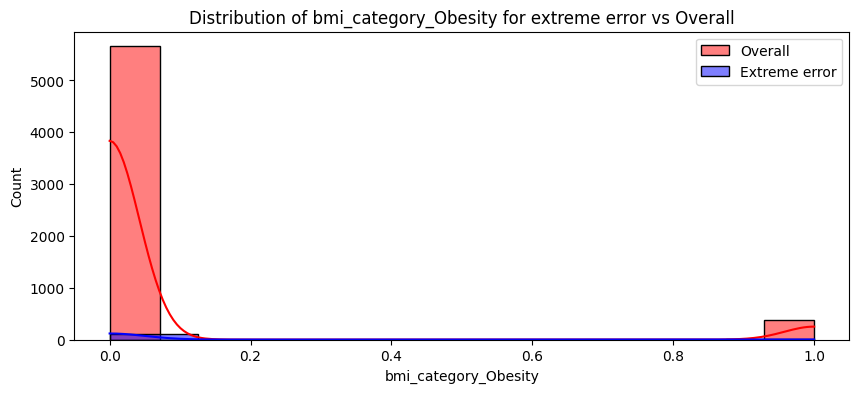

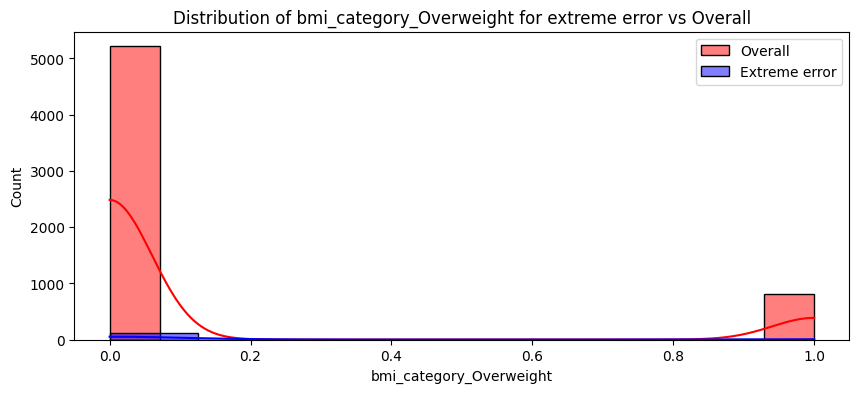

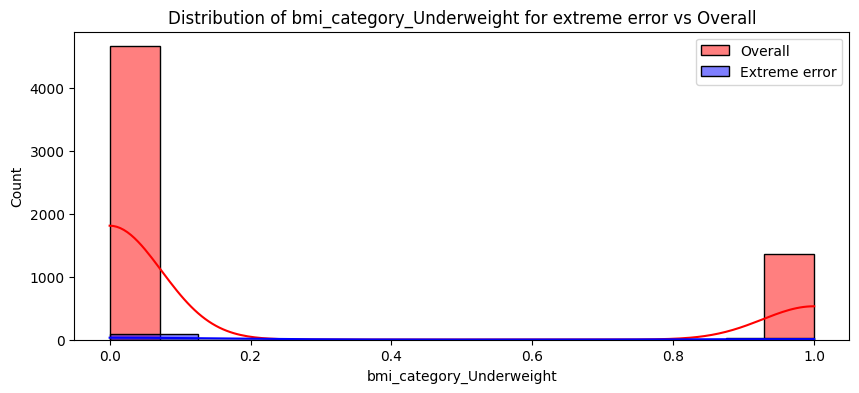

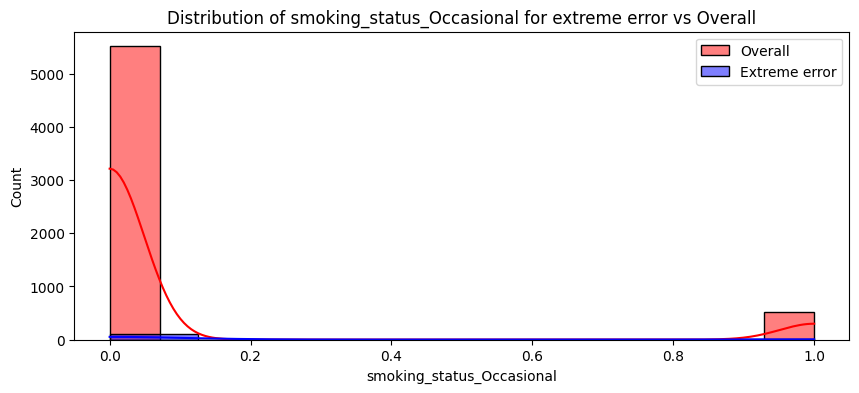

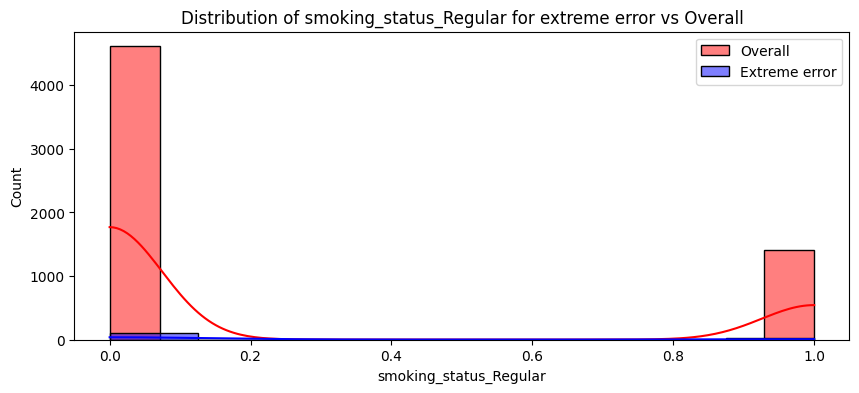

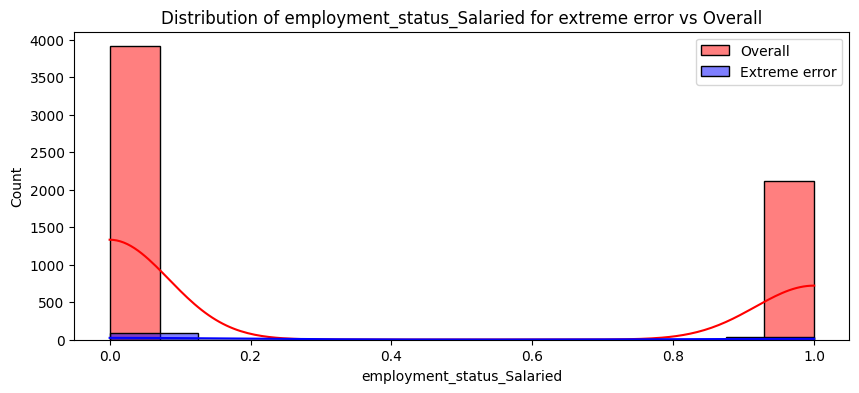

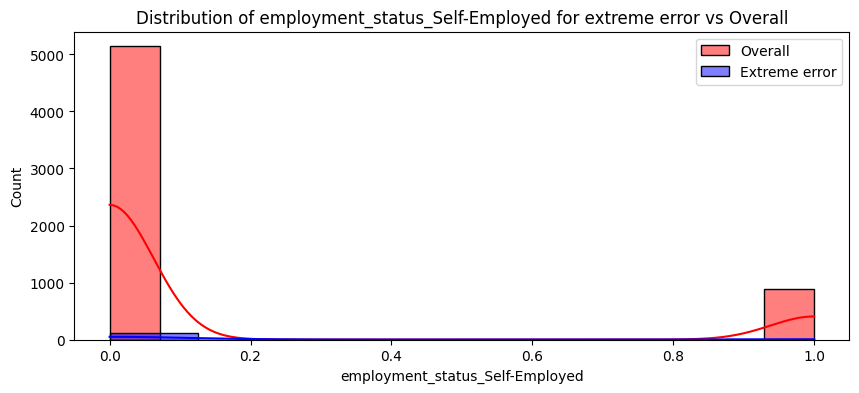

In [76]:
for feature in X_test.columns:
  plt.figure(figsize=(10, 4))
  sns.histplot(X_test[feature], color='red', label="Overall", kde=True)
  sns.histplot(extreme_errors_df[feature], color='blue', label="Extreme error", alpha=0.5, kde=True)
  plt.title(f'Distribution of {feature} for extreme error vs Overall')
  plt.legend()
  plt.show()



> age has some error, error_data is centric towards lower_age_group. We have to scale back to see the accurate age value.



In [77]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [78]:
extreme_errors_df['income_level']=-1

we have to initialize income_level to perform inverse_scaaling, because we have dropped the column while performing "VIF".

<Axes: xlabel='age', ylabel='Count'>

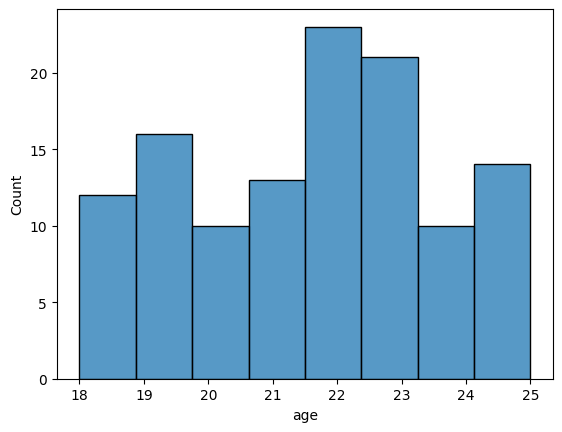

In [79]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
sns.histplot(df_reversed['age'])

In [80]:
df_reversed['age'].quantile(0.97)

np.float64(25.0)

# We can see that 97% of people age is <=25. The error lies here only. we have to do model segmentation.

# Export the model

In [81]:
from joblib import dump

dump(best_model, "/content/drive/MyDrive/Healthcare_premium_pred/model_young.joblib")

['/content/drive/MyDrive/Healthcare_premium_pred/model_young.joblib']

In [82]:
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(scaler_with_cols, "/content/drive/MyDrive/Healthcare_premium_pred/scaler_young.joblib")

['/content/drive/MyDrive/Healthcare_premium_pred/scaler_young.joblib']